In [1]:
import os

# move up from notebooks -> project root
os.chdir(os.path.join(os.getcwd(),os.pardir))
print("Working dir is now:", os.getcwd())


import torch 
import numpy as np
import matplotlib.pyplot as plt

from initialize import OUTPUT_PATH, PREPROCESSED_MAUS_DATA_PATH


Working dir is now: /Users/adrian/Documents/01_projects/02_clean_ppg


In [2]:
finger_path = PREPROCESSED_MAUS_DATA_PATH +"/data_dict_maus_finger_filtered.pt"
wrist_path = PREPROCESSED_MAUS_DATA_PATH +"/data_dict_maus_wrist_filtered.pt"

# Load the data
finger_data = torch.load(finger_path, weights_only=False)
wrist_data = torch.load(wrist_path, weights_only=False)

In [3]:
finger_data["002"].keys(), wrist_data.keys()

(dict_keys(['age', 'gender', 'high_bp', 'baseline_sbp', 'baseline_dbp', 'height', 'weight', 'cvd_meds', 'fitzpatrick_scale', 'pressure_quality', 'optical_quality', 'raw_optical', 'delta_t', 'sampling_rate', 'ppg', 'vpg', 'apg', 'jpg', 'fiducials_pyPPG', 'individual_waves', 'fid_on_ppg', 'wave_durations', 'average_hr', 'rise_times_norm', 'rise_times_ms', 'average_rise_time_norm', 'average_rise_time_ms', 'ensemble_wave', 'ensemble_ppg', 'ensemble_vpg', 'ensemble_apg', 'ensemble_jpg', 'individual_wave_derivs_ppg_arr', 'individual_wave_derivs_vpg_arr', 'individual_wave_derivs_apg_arr', 'individual_wave_derivs_jpg_arr', 'ensemble_ppg_avg', 'ensemble_vpg_avg', 'ensemble_apg_avg', 'ensemble_jpg_avg']),
 dict_keys(['002', '004', '005', '006', '008', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025']))

In [4]:
# # compare the ensemble PPG signals for finger and wrist
# os.makedirs(OUTPUT_PATH+"/finger_vs_wrist", exist_ok=True)

# id = "002" #02, 11, 12, 21,-> Attention: 13, 14, 18, 19 does not work - fingerPPG is zero (I guess my algo excluded this due to too low quality?)! 
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.plot(finger_data[id]["ensemble_ppg"], label='Finger PPG')
# plt.xlabel("Sample Index")
# plt.ylabel("Normalized Amplitude")
# plt.title("Finger")

# plt.subplot(1, 2, 2)
# plt.plot(wrist_data[id]["ensemble_ppg"], label='Wrist PPG')
# plt.title("Wrist")
# plt.xlabel("Sample Index")
# plt.yticks([])  # Hide y-ticks for clarity

# plt.suptitle("Ensemble PPG Signals for Finger and Wrist")
# plt.tight_layout()
# plt.savefig(OUTPUT_PATH +"/finger_vs_wrist/ensemble_ppg_signals.png")
# plt.savefig(OUTPUT_PATH +"/finger_vs_wrist/ensemble_ppg_signals.pdf")
# plt.show()

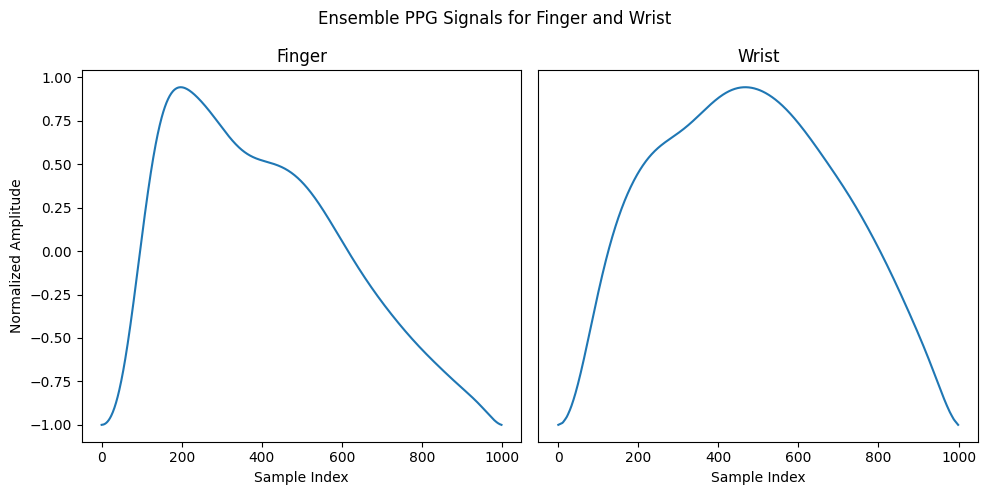

In [5]:
# # compare the ensemble PPG signals for finger and wrist
# os.makedirs(OUTPUT_PATH+"/finger_vs_wrist", exist_ok=True)

# id = "002" #02, 11, 12, 21,-> Attention: 13, 14, 18, 19 does not work - fingerPPG is zero (I guess my algo excluded this due to too low quality?)! 
# plt.figure(figsize=(5,8))

# plt.subplot(2, 1, 1)

# # add all individual PPG waves 
# # for i in range(len(finger_data[id]["individual_wave_derivs_ppg_arr"])):
#     # plt.plot(finger_data[id]["individual_wave_derivs_ppg_arr"][i]*2, alpha=0.02, color='lightgray')

# for i in range(len(finger_data[id]["individual_waves"])):
#     plt.plot(finger_data[id]["individual_waves"][i], alpha=0.1, color='lightgray')

# plt.plot(finger_data[id]["ensemble_ppg"], label='Finger PPG')

# # plt.xlabel("Sample Index")
# plt.xticks([])  # Hide x-ticks for clarity
# plt.ylabel("Normalized Amplitude")
# plt.title("Finger")
# # plt.title("Finger, n="+str(len(finger_data[id]["individual_waves"])))

# plt.subplot(2, 1, 2)

# # add all individual PPG waves 
# for i in range(len(wrist_data[id]["individual_waves"])):
#     plt.plot(wrist_data[id]["individual_waves"][i], alpha=0.1, color='lightgray')

# # for i in range(len(wrist_data[id]["individual_wave_derivs_ppg_arr"])):
# #     plt.plot(wrist_data[id]["individual_wave_derivs_ppg_arr"][i]*2, alpha=0.1, color='lightgray')

# plt.plot(wrist_data[id]["ensemble_ppg"], label='Wrist PPG')

# plt.title("Wrist")
# # plt.title("Wrist, n="+str(len(wrist_data[id]["individual_waves"])))
# plt.ylabel("Normalized Amplitude")
# plt.xlabel("Sample Index")


# plt.suptitle("Ensemble PPG Signals for Finger and Wrist")
# plt.tight_layout()
# plt.savefig(OUTPUT_PATH +"/finger_vs_wrist/ensemble_ppg_signals.png")
# plt.savefig(OUTPUT_PATH +"/finger_vs_wrist/ensemble_ppg_signals.pdf")
# plt.show()

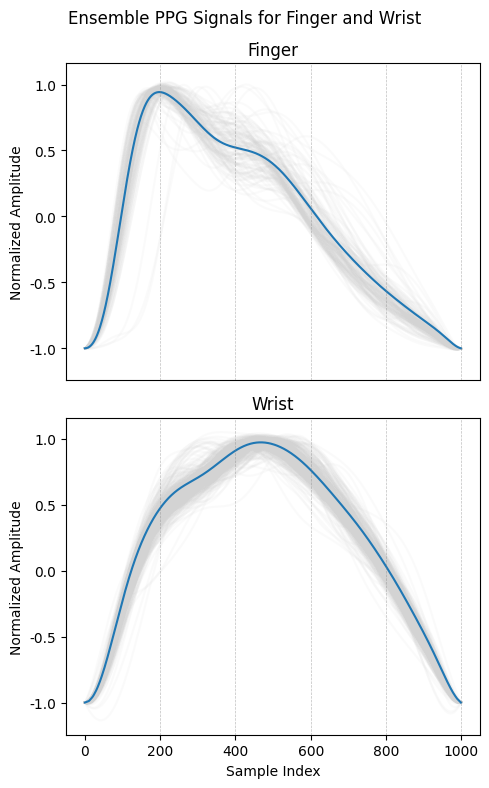

In [6]:
# compare the ensemble PPG signals for finger and wrist
os.makedirs(OUTPUT_PATH+"/finger_vs_wrist", exist_ok=True)

id = "002" #02, 11, 12, 21,-> Attention: 13, 14, 18, 19 does not work - fingerPPG is zero (I guess my algo excluded this due to too low quality?)! 
# plt.figure(figsize=(5,8))
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1,
    # sharex=True, 
    sharey=True,          # ← lock both limits & tick‐locations
    figsize=(5, 8),
    gridspec_kw={'height_ratios': [1, 1]}
)

plt.subplot(2, 1, 1)

# add all individual PPG waves 
for i in range(len(finger_data[id]["individual_wave_derivs_ppg_arr"])):
    this_wave = finger_data[id]["individual_wave_derivs_ppg_arr"][i]
    # detrend the wave (subtract a linear connection between the first and last point)
    this_wave = this_wave * 2
    this_wave = this_wave - (this_wave[0] + (this_wave[-1] - this_wave[0]) * np.arange(len(this_wave)) / (len(this_wave) - 1))
    ax1.plot(this_wave-1, alpha=0.1, color='lightgray')

ax1.plot(finger_data[id]["ensemble_ppg"], label='Finger PPG')

# plt.xlabel("Sample Index")
ax1.set_xticks([])  # Hide x-ticks for clarity

# make that y-ticks have all the same number of digits after the decimal point
ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

ax1.set_ylabel("Normalized Amplitude")
# plt.title("Finger, n="+str(len(finger_data[id]["individual_waves"])))
ax1.set_title("Finger")

ax2 = plt.subplot(2, 1, 2)

# add all individual PPG waves 
for i in range(len(wrist_data[id]["individual_wave_derivs_ppg_arr"])):
    this_wave = wrist_data[id]["individual_wave_derivs_ppg_arr"][i]
    # detrend the wave (subtract a linear connection between the first and last point)
    this_wave = this_wave * 2
    this_wave = this_wave - (this_wave[0] + (this_wave[-1] - this_wave[0]) * np.arange(len(this_wave)) / (len(this_wave) - 1))
    ax2.plot(this_wave-1, alpha=0.1, color='lightgray')

ax2.plot(wrist_data[id]["ensemble_ppg"], label='Wrist PPG')

ax2.set_title("Wrist")
# plt.title("Wrist, n="+str(len(wrist_data[id]["individual_waves"])))
ax2.set_ylabel("Normalized Amplitude")
ax2.set_xlabel("Sample Index")


# add for both plots vertical lines at 200, 400, 600, 800, 1000
for ax in (ax1, ax2):
    for x in range(200, 1200, 200):
        ax.axvline(x=x, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.suptitle("Ensemble PPG Signals for Finger and Wrist")
plt.tight_layout()
plt.savefig(OUTPUT_PATH +"/finger_vs_wrist/ensemble_ppg_signals.png")
plt.savefig(OUTPUT_PATH +"/finger_vs_wrist/ensemble_ppg_signals.pdf")
plt.show()


dict_keys(['age', 'gender', 'high_bp', 'baseline_sbp', 'baseline_dbp', 'height', 'weight', 'cvd_meds', 'fitzpatrick_scale', 'pressure_quality', 'optical_quality', 'raw_optical', 'delta_t', 'sampling_rate', 'ppg', 'vpg', 'apg', 'jpg', 'fiducials_pyPPG', 'individual_waves', 'fid_on_ppg', 'wave_durations', 'average_hr', 'rise_times_norm', 'rise_times_ms', 'average_rise_time_norm', 'average_rise_time_ms', 'ensemble_wave', 'ensemble_ppg', 'ensemble_vpg', 'ensemble_apg', 'ensemble_jpg', 'individual_wave_derivs_ppg_arr', 'individual_wave_derivs_vpg_arr', 'individual_wave_derivs_apg_arr', 'individual_wave_derivs_jpg_arr', 'ensemble_ppg_avg', 'ensemble_vpg_avg', 'ensemble_apg_avg', 'ensemble_jpg_avg'])


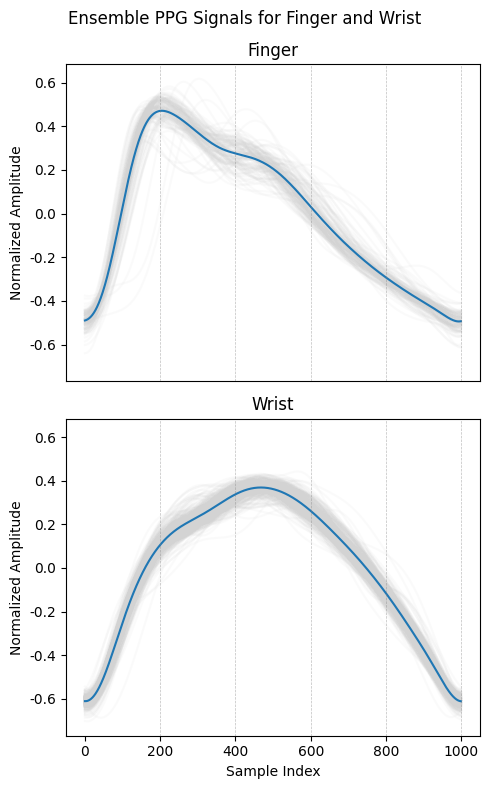

In [23]:
# get the darkest color from the "Blues" colormap
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# dark_color = mcolors.to_hex(cm.Blues(256))
dark_color = "tab:blue"


# compare the ensemble PPG signals for finger and wrist
os.makedirs(OUTPUT_PATH+"/finger_vs_wrist", exist_ok=True)

id = "002" #02, 11, 12, 21,-> Attention: 13, 14, 18, 19 does not work - fingerPPG is zero (I guess my algo excluded this due to too low quality?)! 
# plt.figure(figsize=(5,8))
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1,
    # sharex=True, 
    sharey=True,          # ← lock both limits & tick‐locations
    figsize=(5, 8),
    gridspec_kw={'height_ratios': [1, 1]}
)

plt.subplot(2, 1, 1)

# add all individual PPG waves 
for i in range(len(finger_data[id]["individual_wave_derivs_ppg_arr"])):
    this_wave = finger_data[id]["individual_wave_derivs_ppg_arr"][i]
    # detrend the wave (subtract a linear connection between the first and last point)
    # this_wave = this_wave * 2
    # this_wave = this_wave - (this_wave[0] + (this_wave[-1] - this_wave[0]) * np.arange(len(this_wave)) / (len(this_wave) - 1))
    ax1.plot(this_wave, alpha=0.1, color='lightgray')

print(finger_data[id].keys())
ax1.plot(finger_data[id]["ensemble_ppg_avg"], color=dark_color, label='Finger PPG')

# plt.xlabel("Sample Index")
ax1.set_xticks([])  # Hide x-ticks for clarity

# make that y-ticks have all the same number of digits after the decimal point
ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

ax1.set_ylabel("Normalized Amplitude")
# plt.title("Finger, n="+str(len(finger_data[id]["individual_waves"])))
ax1.set_title("Finger")

ax2 = plt.subplot(2, 1, 2)

# add all individual PPG waves 
for i in range(len(wrist_data[id]["individual_wave_derivs_ppg_arr"])):
    this_wave = wrist_data[id]["individual_wave_derivs_ppg_arr"][i]
    # detrend the wave (subtract a linear connection between the first and last point)
    # this_wave = this_wave * 2
    # this_wave = this_wave - (this_wave[0] + (this_wave[-1] - this_wave[0]) * np.arange(len(this_wave)) / (len(this_wave) - 1))
    ax2.plot(this_wave, alpha=0.1, color='lightgray')

ax2.plot(wrist_data[id]["ensemble_ppg_avg"], color=dark_color, label='Wrist PPG')

ax2.set_title("Wrist")
# plt.title("Wrist, n="+str(len(wrist_data[id]["individual_waves"])))
ax2.set_ylabel("Normalized Amplitude")
ax2.set_xlabel("Sample Index")


# add for both plots vertical lines at 200, 400, 600, 800, 1000
for ax in (ax1, ax2):
    for x in range(200, 1200, 200):
        ax.axvline(x=x, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.suptitle("Ensemble PPG Signals for Finger and Wrist")
plt.tight_layout()
plt.savefig(OUTPUT_PATH +"/finger_vs_wrist/ensemble_ppg_signals.png")
plt.savefig(OUTPUT_PATH +"/finger_vs_wrist/ensemble_ppg_signals.pdf")#
plt.savefig(OUTPUT_PATH +"/finger_vs_wrist/ensemble_ppg_signals.svg")
plt.show()


In [8]:
finger_data["002"].keys()

dict_keys(['age', 'gender', 'high_bp', 'baseline_sbp', 'baseline_dbp', 'height', 'weight', 'cvd_meds', 'fitzpatrick_scale', 'pressure_quality', 'optical_quality', 'raw_optical', 'delta_t', 'sampling_rate', 'ppg', 'vpg', 'apg', 'jpg', 'fiducials_pyPPG', 'individual_waves', 'fid_on_ppg', 'wave_durations', 'average_hr', 'rise_times_norm', 'rise_times_ms', 'average_rise_time_norm', 'average_rise_time_ms', 'ensemble_wave', 'ensemble_ppg', 'ensemble_vpg', 'ensemble_apg', 'ensemble_jpg', 'individual_wave_derivs_ppg_arr', 'individual_wave_derivs_vpg_arr', 'individual_wave_derivs_apg_arr', 'individual_wave_derivs_jpg_arr', 'ensemble_ppg_avg', 'ensemble_vpg_avg', 'ensemble_apg_avg', 'ensemble_jpg_avg'])

In [9]:
wrist_data["002"]["sampling_rate"]

np.float64(100.0)

256.0
Mean duration: 299.41034226190476, IQR duration: 0.0
Mean duration: 299.41034226190476, IQR duration: 0.0, Std duration: 1.8412886160826119


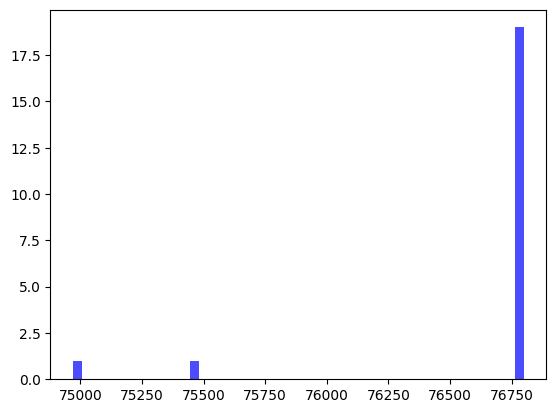

100.0
Mean duration: 299.9166666666667, IQR duration: 0.0
Mean duration: 299.9166666666667, IQR duration: 0.0, Std duration: 2.226114131616824


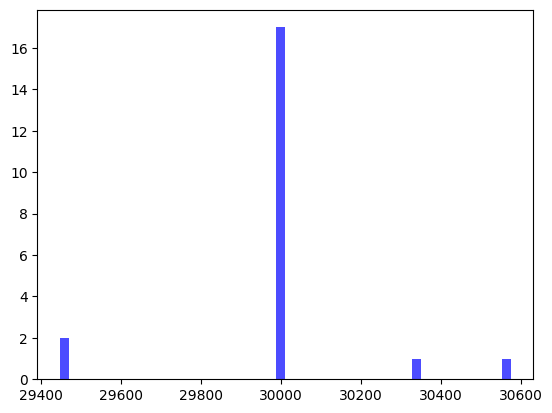

In [10]:
durations = []
fs = finger_data["002"]["sampling_rate"]  # assuming all subjects have the same fs
print(fs) 

for d in finger_data: 
    durations.append(len(finger_data[d]["raw_optical"])) # ["002"]["ppg"]

plt.hist(durations, bins=50, color='blue', alpha=0.7)
# get mean and IQR of durations
mean_duration = np.mean(durations)
iqr_duration = np.percentile(durations, 75) - np.percentile(durations, 25)
print(f"Mean duration: {mean_duration/fs}, IQR duration: {iqr_duration/fs}")


# get mean and std of durations
mean_duration = np.mean(durations)
std_duration = np.std(durations)
print(f"Mean duration: {mean_duration/fs}, IQR duration: {iqr_duration/fs}, Std duration: {std_duration/fs}")

plt.show()


durations = []
fs = wrist_data["002"]["sampling_rate"]  # assuming all subjects have the same fs
print(fs) 

for d in wrist_data: 
    durations.append(len(wrist_data[d]["raw_optical"])) # ["002"]["ppg"]

plt.hist(durations, bins=50, color='blue', alpha=0.7)
# get mean and IQR of durations
mean_duration = np.mean(durations)
iqr_duration = np.percentile(durations, 75) - np.percentile(durations, 25)
print(f"Mean duration: {mean_duration/fs}, IQR duration: {iqr_duration/fs}")


# get mean and std of durations
mean_duration = np.mean(durations)
std_duration = np.std(durations)
print(f"Mean duration: {mean_duration/fs}, IQR duration: {iqr_duration/fs}, Std duration: {std_duration/fs}")


# Aurora-BP 

In [11]:
# load aurora data
from initialize import PREPROCESSED_AURORA_DATA_PATH
# aurora_path = PREPROCESSED_AURORA_DATA_PATH +
aurora_path = PREPROCESSED_AURORA_DATA_PATH + "/data_dict_osc_auc_with_derivatives_with_classes.pt"
aurora_data = torch.load(aurora_path, weights_only=False)

In [12]:
aurora_data["a000"].keys(), aurora_data["a000"]["sampling_rate"]


(dict_keys(['age', 'gender', 'high_bp', 'baseline_sbp', 'baseline_dbp', 'height', 'weight', 'cvd_meds', 'fitzpatrick_scale', 'pressure_quality', 'optical_quality', 'raw_optical', 'delta_t', 'sampling_rate', 'ppg', 'vpg', 'apg', 'jpg', 'fiducials_pyPPG', 'individual_waves', 'fid_on_ppg', 'wave_durations', 'average_hr', 'rise_times_norm', 'rise_times_ms', 'average_rise_time_norm', 'average_rise_time_ms', 'ensemble_wave', 'individual_wave_derivs_ppg_arr', 'individual_wave_derivs_vpg_arr', 'individual_wave_derivs_apg_arr', 'individual_wave_derivs_jpg_arr', 'ensemble_ppg_avg', 'ensemble_vpg_avg', 'ensemble_apg_avg', 'ensemble_jpg_avg', 'oscillo_or_auscul', 'bmi', 'height_m', 'weight_kg', 'individual_waves_classes', 'ensemble_class', 'area_under_the_curve_unsign_wave', 'area_under_the_curve_sign_wave', 'area_under_the_curve_unsign', 'area_under_the_curve_sign']),
 np.float64(500.00000005684257))

{np.float64(500.0)}


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 686.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([499.5 , 499.52, 499.54, 499.56, 499.58, 499.6 , 499.62, 499.64,
        499.66, 499.68, 499.7 , 499.72, 499.74, 499.76, 499.78, 499.8 ,
        499.82, 499.84, 499.86, 499.88, 499.9 , 499.92, 499.94, 499.96,
        499.98, 500.  , 500.02, 500.04, 500.06, 500.08, 500.1 , 500.12,
        500.14, 500.16, 500.18, 500.2 , 500.22, 500.24, 500.26, 500.28,
        500.3 , 500.32, 500.34, 500.36, 500.38, 500.4 , 500.42, 500.44,
        500.46, 500.48, 500.5 ]),
 <BarContainer object of 50 artists>)

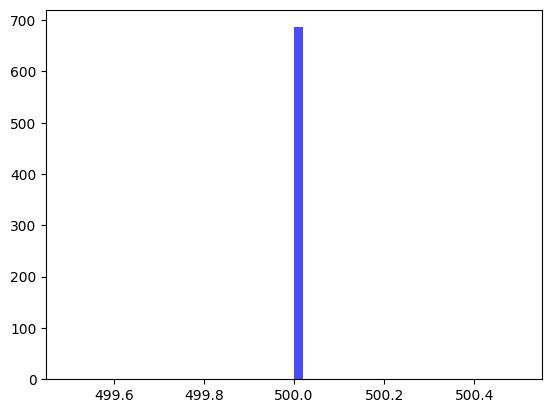

In [13]:
fs_aurora = []

for i in aurora_data:
    fs_aurora.append(aurora_data[i]["sampling_rate"])

fs_aurora = np.array(fs_aurora)
fs_aurora = np.round(fs_aurora, 2)  # round to 2 decimal places
print(set(fs_aurora))  # should be all the same
plt.hist(fs_aurora, bins=50, color='blue', alpha=0.7)

In [14]:
15*500


7500

[]


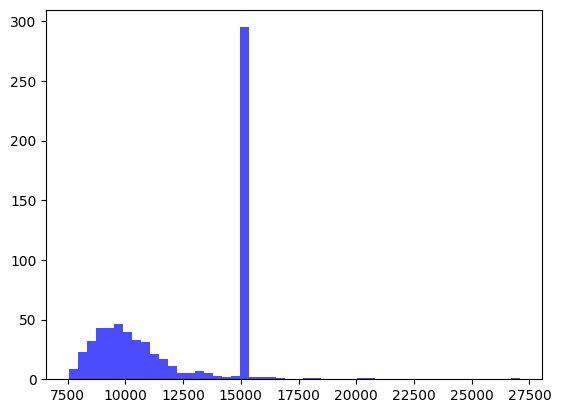

In [15]:
durations = []
for id in aurora_data:
    # get all durations from the raw_optical data
    durations.append(len(aurora_data[id]["raw_optical"]))
plt.hist(durations, bins=50, color='blue', alpha=0.7)
# # get mean and IQR of durations
# mean_duration = np.mean(durations)
durations = np.array(durations)
print(durations[durations<7500])